# Explore the Dataset

In [1]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

/home/ascera/anaconda3/envs/p4-module/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


/home/ascera/anaconda3/envs/p4-module/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

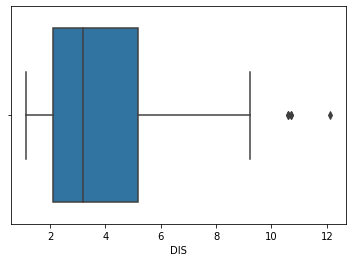

In [2]:
# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In the above graph, can clearly see that values above 10 are acting as the outliers.

# Find Outliers

In [3]:
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355]),)


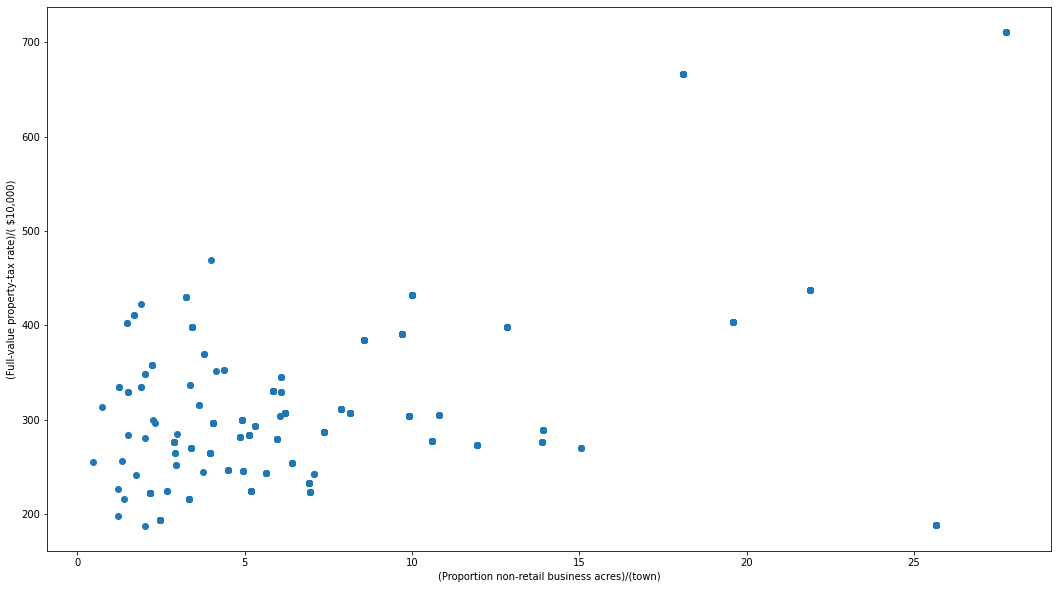

In [4]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers. The following code can fetch the exact position of all those points that satisfy these conditions. 

# Z Score

In [5]:
# Z score
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


The above output is just a snapshot of part of the data; the actual length of the list(z) is 506 that is the number of rows. It prints the z-score values of each data item of the column

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [6]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([351, 352, 353, 354, 355]),)


# Inter Quartile Range (IQR)

In [7]:
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

In [8]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
upper_1 = np.where(upper)
 
print("Upper bound:",upper)
print(upper_1)
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
lower_1 = np.where(lower)

print("Lower bound:", lower)
print(lower_1)

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355]),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


# Removing the Outliers

For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [9]:
print("Old Shape: ", df_boston.shape)

df_boston.drop(upper_1[0], inplace = True)
df_boston.drop(lower_1[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

Old Shape:  (506, 13)
New Shape:  (501, 13)
